In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from numba import jit

In [3]:
def f_sym(x,a):
    a_ = a*np.exp(2j*x)/(1-a*np.exp(2j*x))
    f = 1/(2*np.pi) * (1+ (a_+a_.conjugate()))
    return f

def f_asym(x,a):
    a_ = a*np.exp(1j*x)/(1-a*np.exp(2j*x))
    f = 1/(2*np.pi) * ((a_+a_.conjugate()))
    return f

In [4]:
x = np.linspace(0,2*np.pi,1000)

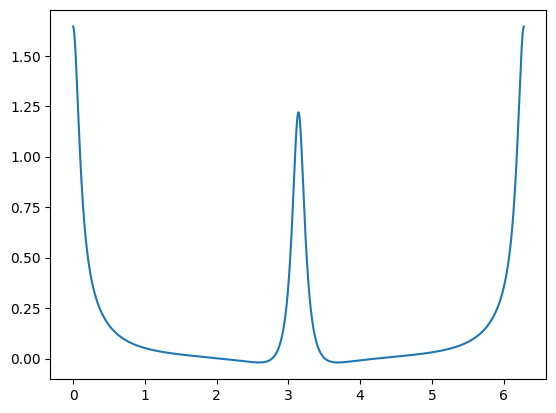

In [25]:
plt.plot(x,f_sym(x,0.8).real+f_asym(x,0.4).real)

In [84]:
from sympy import *

In [85]:
H,Hs = symbols('H H^*',complex=True)
theta,t,alpha,n,omega,eta = symbols('theta t alpha n omega eta')
a = Function('a')('t')
a_s = Function('a^*')('t')
b = Function('b')('t')
b_s = Function('b^*')('t')
A = Sum((a**n*(E**(I*theta))**(2*n-1)),(n,1,6)).doit()
As = Sum((a_s**n*(E**(-I*theta))**(2*n-1)),(n,1,6)).doit()
B = Sum((b**n*(E**(I*theta))**(2*n)),(n,1,6)).doit()
Bs = Sum((b_s**n*(E**(-I*theta))**(2*n)),(n,1,6)).doit()
f = 1/(2*pi) * (1+((A+As)+(B+Bs)))
v = omega + 1/(2*I) * (H*E**(-I*(2*theta+alpha))-Hs*E**(I*(2*theta+alpha)))

In [86]:
f.diff(t)

(6*a(t)**5*exp(11*I*theta)*Derivative(a(t), t) + 5*a(t)**4*exp(9*I*theta)*Derivative(a(t), t) + 4*a(t)**3*exp(7*I*theta)*Derivative(a(t), t) + 3*a(t)**2*exp(5*I*theta)*Derivative(a(t), t) + 2*a(t)*exp(3*I*theta)*Derivative(a(t), t) + 6*a^*(t)**5*exp(-11*I*theta)*Derivative(a^*(t), t) + 5*a^*(t)**4*exp(-9*I*theta)*Derivative(a^*(t), t) + 4*a^*(t)**3*exp(-7*I*theta)*Derivative(a^*(t), t) + 3*a^*(t)**2*exp(-5*I*theta)*Derivative(a^*(t), t) + 2*a^*(t)*exp(-3*I*theta)*Derivative(a^*(t), t) + 6*b(t)**5*exp(12*I*theta)*Derivative(b(t), t) + 5*b(t)**4*exp(10*I*theta)*Derivative(b(t), t) + 4*b(t)**3*exp(8*I*theta)*Derivative(b(t), t) + 3*b(t)**2*exp(6*I*theta)*Derivative(b(t), t) + 2*b(t)*exp(4*I*theta)*Derivative(b(t), t) + 6*b^*(t)**5*exp(-12*I*theta)*Derivative(b^*(t), t) + 5*b^*(t)**4*exp(-10*I*theta)*Derivative(b^*(t), t) + 4*b^*(t)**3*exp(-8*I*theta)*Derivative(b^*(t), t) + 3*b^*(t)**2*exp(-6*I*theta)*Derivative(b^*(t), t) + 2*b^*(t)*exp(-4*I*theta)*Derivative(b^*(t), t) + exp(2*I*theta)*

In [87]:
col_ = collect(together(f.diff(t)+(f*v).diff(theta)).expand(),E**(1j*theta))

In [88]:
col_

-13*H*a^*(t)**6*exp(-I*alpha)/(4*pi*exp(1.0*I*theta)**13.0) - 7*H*b^*(t)**6*exp(-I*alpha)/(2*pi*exp(1.0*I*theta)**14.0) - 13*H^**a(t)**6*exp(I*alpha)*exp(1.0*I*theta)**13.0/(4*pi) - 7*H^**b(t)**6*exp(I*alpha)*exp(1.0*I*theta)**14.0/(2*pi) + (-11*H*a^*(t)**5*exp(-I*alpha)/(4*pi) - 11*I*omega*a^*(t)**6/(2*pi) + 3*a^*(t)**5*Derivative(a^*(t), t)/pi)/exp(1.0*I*theta)**11.0 + (-3*H*b^*(t)**5*exp(-I*alpha)/pi - 6*I*omega*b^*(t)**6/pi + 3*b^*(t)**5*Derivative(b^*(t), t)/pi)/exp(1.0*I*theta)**12.0 + (-11*H^**a(t)**5*exp(I*alpha)/(4*pi) + 11*I*omega*a(t)**6/(2*pi) + 3*a(t)**5*Derivative(a(t), t)/pi)*exp(1.0*I*theta)**11.0 + (-3*H^**b(t)**5*exp(I*alpha)/pi + 6*I*omega*b(t)**6/pi + 3*b(t)**5*Derivative(b(t), t)/pi)*exp(1.0*I*theta)**12.0 + (-H*exp(-I*alpha)/(2*pi) + H^**b^*(t)**2*exp(I*alpha)/(2*pi) - I*omega*b^*(t)/pi + Derivative(b^*(t), t)/(2*pi))/exp(1.0*I*theta)**2.0 + (-H*a(t)*exp(-I*alpha)/(4*pi) + H^**a^*(t)**2*exp(I*alpha)/(4*pi) - I*omega*a^*(t)/(2*pi) + Derivative(a^*(t), t)/(2*pi))/ex

In [16]:
fa = -I*omega*a + 1/2 *(Hs*a_s*E**(I*alpha)-H*a**2*E**(-I*alpha))

In [18]:
Reals(fa)

TypeError: 'Reals' object is not callable

In [26]:
def to_complex(Zs):
    a1real,a1imag,b1real,b1imag,a2real,a2imag,b2real,b2imag = Zs.T
    a1 = a1real + 1j*a1imag
    a2 = a2real + 1j*a2imag
    b1 = b1real + 1j*b1imag
    b2 = b2real + 1j*b2imag
    return a1,b1,a2,b2

In [114]:
@jit(nopython=True)
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

@jit(nopython=True)
def dZ_dt(Zs,t,alpha,beta,eta1,eta2):
    a1real,a1imag,b1real,b1imag,a2real,a2imag,b2real,b2imag = Zs
    a1 = a1real + 1j*a1imag
    a2 = a2real + 1j*a2imag
    b1 = b1real + 1j*b1imag
    b2 = b2real + 1j*b2imag
    Z11 = np.conj(a1)
    Z12 = np.conj(a2)
    H1 = Z11**2 + 2*beta*Z11*Z12 + beta**2*Z12**2
    H2 = Z12**2 + 2*beta*Z11*Z12 + beta**2*Z11**2
    
    da1 = 1/2 *(np.conj(H1)*np.conj(a1)*np.exp(1j*alpha) - H1*a1**2*np.exp(-1j*alpha) )
    db1 = (np.conj(H1)*np.exp(1j*alpha) - H1*b1**2*np.exp(-1j*alpha) )
    da2 = 1/2 *(np.conj(H2)*np.conj(a2)*np.exp(1j*alpha) - H2*a2**2*np.exp(-1j*alpha) )
    db2 = (np.conj(H2)*np.exp(1j*alpha) - H2*b2**2*np.exp(-1j*alpha) )
    return np.array([da1.real,da1.imag,db1.real,db1.imag,da2.real,da2.imag,db2.real,db2.imag])


@jit(nopython=True)
def dZ2_dt(Zs,t,alpha,beta,eta1,eta2):
    a1real,a1imag,b1real,b1imag,c1real,c1imag,a2real,a2imag,b2real,b2imag,c2real,c2imag = Zs
    a1 = a1real + 1j*a1imag
    a2 = a2real + 1j*a2imag
    b1 = b1real + 1j*b1imag
    b2 = b2real + 1j*b2imag
    c1 = c1real + 1j*c1imag
    c2 = c2real + 1j*c2imag
    
    Z11 = 1/2 * (np.conj(a1)+np.conj(b1)) + eta1/2 * (np.conj(a1)-np.conj(b1))
    Z12 = 1/2 * (np.conj(a2)+np.conj(b2)) + eta2/2 * (np.conj(a2)-np.conj(b2))
    H1 = (Z11**2 + 2*beta*Z11*Z12 + beta**2*Z12**2)
    H2 = (Z12**2 + 2*beta*Z11*Z12 + beta**2*Z11**2)
    
    da1 = 1/2 *(np.conj(H1)*np.conj(a1)*np.exp(1j*alpha) - H1*a1**3*np.exp(-1j*alpha) )
    db1 = 1/2 *(np.conj(H1)*np.conj(b1)*np.exp(1j*alpha) - H1*b1**3*np.exp(-1j*alpha) )
    dc1 = (np.conj(H1)*np.exp(1j*alpha) - H1*c1**2*np.exp(-1j*alpha) )
    da2 = 1/2 *(np.conj(H2)*np.conj(a2)*np.exp(1j*alpha) - H2*a2**3*np.exp(-1j*alpha) )
    db2 = 1/2 *(np.conj(H2)*np.conj(b2)*np.exp(1j*alpha) - H2*b2**3*np.exp(-1j*alpha) )
    dc2 = (np.conj(H2)*np.exp(1j*alpha) - H2*c2**2*np.exp(-1j*alpha) )
    return np.array([da1.real,da1.imag,db1.real,db1.imag,dc1.real,dc1.imag,da2.real,da2.imag,db2.real,db2.imag,dc2.real,dc2.imag])


def to_complex(Zs):
    a1real,a1imag,b1real,b1imag,a2real,a2imag,b2real,b2imag = Zs.T
    a1 = a1real + 1j*a1imag
    a2 = a2real + 1j*a2imag
    b1 = b1real + 1j*b1imag
    b2 = b2real + 1j*b2imag
    return a1,b1,a2,b2

def to_complex2(Zs):
    a1real,a1imag,b1real,b1imag,c1real,c1imag,a2real,a2imag,b2real,b2imag,c2real,c2imag = Zs.T
    a1 = a1real + 1j*a1imag
    a2 = a2real + 1j*a2imag
    b1 = b1real + 1j*b1imag
    b2 = b2real + 1j*b2imag
    c1 = c1real + 1j*c1imag
    c2 = c2real + 1j*c2imag
    return a1,b1,c1,a2,b2,c2

In [111]:
alpha = 1.2
beta = 0.8
eta1 = 0.2
eta2 = 0.1

In [103]:
t = np.arange(0,5000,0.01)

In [104]:
A1 = 1
A2 = np.sqrt(0.6)
shift = 0.0 * np.pi

a1 =  eta1*0.2 + 0j
b1 =  1 + 0j
a2 =  eta2 * np.sqrt(0.6) + 0j
b2 =  0.6 + 0j

Zs = RK4(dZ_dt,np.array([a1.real,a1.imag,b1.real,b1.imag,a2.real,a2.imag,b2.real,b2.imag]),t,args=(alpha,beta,eta1,eta2))#[::1000]
a1s,b1s,a2s,b2s = to_complex(Zs)


In [120]:
A1 = 1
A2 = np.sqrt(0.6)
shift = 0.0 * np.pi

a1 =  A1 *np.exp(0j)
b1 =  a1 * np.exp(np.pi*1j)
c1 = a1**2
a2 =  A2*np.exp(shift*1.0j)
b2 =  a2* np.exp(np.pi*1j)
c2 = a2**2

Zs = RK4(dZ2_dt,np.array([a1.real,a1.imag,b1.real,b1.imag,c1.real,c1.imag,a2.real,a2.imag,b2.real,b2.imag,c2.real,c2.imag]),t,args=(alpha,beta,eta1,eta2))#[::1000]
a1s,b1s,c1s,a2s,b2s,c2s = to_complex2(Zs)

RZ1 = 1/2 * (np.conj(a1s)+np.conj(b1s)) + eta1/2 * (np.conj(a1s)-np.conj(b1s))
QZ1 = 1/2 * (np.conj(a1s)**2+np.conj(b1s)**2) + eta1/2 * (np.conj(a1s)**2-np.conj(b1s)**2)
RZ2 = 1/2 * (np.conj(a2s)+np.conj(b2s)) + eta2/2 * (np.conj(a2s)-np.conj(b2s))
QZ2 = 1/2 * (np.conj(a2s)**2+np.conj(b2s)**2) + eta2/2 * (np.conj(a2s)**2-np.conj(b2s)**2)

R1s = np.abs(RZ1)
R2s = np.abs(RZ2)
Q1s = np.abs(QZ1)
Q2s = np.abs(QZ2)

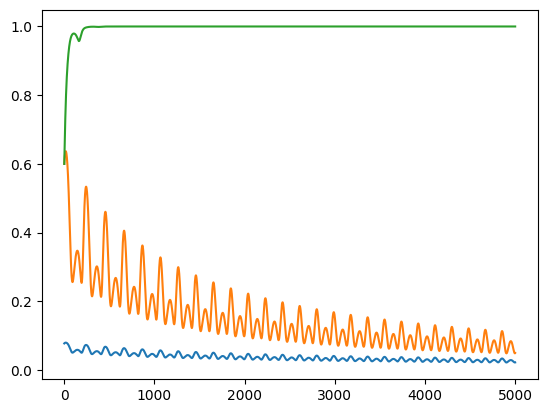

In [122]:
plt.plot(t,R2s)
plt.plot(t,Q2s)
plt.plot(t,np.abs(c2s))

(0.0, 1.0)

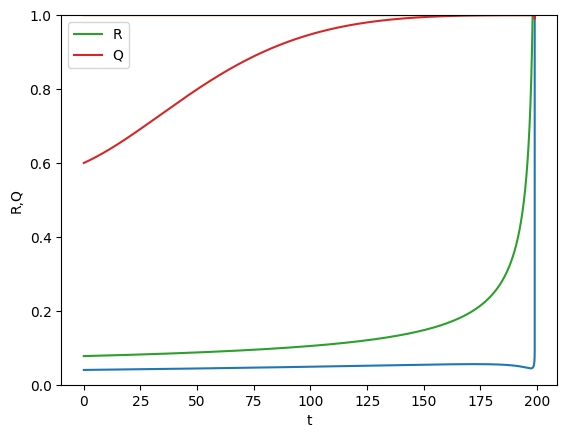

In [105]:
plt.plot(t,np.abs(a1s))
plt.plot(t,np.abs(b1s))

plt.plot(t,np.abs(a2s),label=r'R')
plt.plot(t,np.abs(b2s),label=r'Q')
plt.legend()
plt.ylabel('R,Q')
plt.xlabel('t')
plt.ylim(0,1)

# Phase diagram

In [140]:
@jit(nopython=True)
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y
args = ()
@jit(nopython=True)
def H_Chimera(u,t=0,args = args):
    r1 = u[0]
    r2 = u[1]
    phi = u[2]
    beta,alpha,eta1,eta2 = args
    dr1 = 1/2 * r1* (1-r1**2)*(eta1**2 * r1**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r1*r2*np.cos(alpha+phi) + beta**2 * eta2**2 * r2**2 * np.cos(alpha + 2*phi))
    dr2 = 1/2 * r2* (1-r2**2)*(eta2**2 * r2**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r2*r1*np.cos(alpha-phi) + beta**2 * eta1**2 * r1**2 * np.cos(alpha - 2*phi))
    dpsi1 = -1/2 * (1+r1**2)*(eta1**2 * r1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r1*r2*np.sin(alpha+phi) + beta**2 * eta2**2 * r2**2 * np.sin(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r2**2)*(eta2**2 * r2**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r2*r1*np.sin(alpha-phi) + beta**2 * eta1**2 * r1**2 * np.sin(alpha - 2*phi))
    dphi = dpsi1 - dpsi2
    return np.array([dr1,dr2,dphi])


@jit(nopython=True)
def myFun2(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    dr = 1/2 * r* (1-r**2)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r**2)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =  dpsi2 - dpsi1
    return np.array([dr,dphi])

def myFun3(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    dr = 1/2 * r* (1-r**2)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r**2)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =  dpsi2 - dpsi1
    return np.array([dr,dphi])

/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_464/884165365.py:46: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=[0-1e-4,0+1e-4])


<Figure size 3200x2400 with 0 Axes>

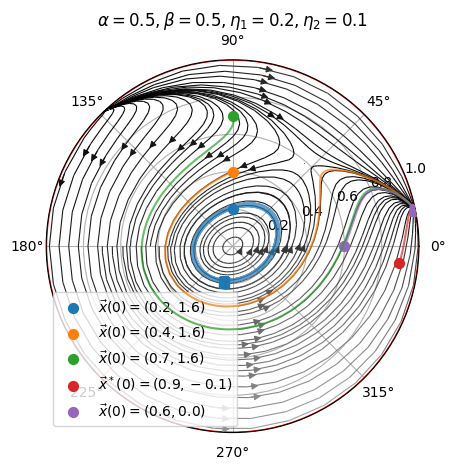

In [178]:
alpha = 0.5
beta = 0.5
eta1 = 0.2
eta2 = 0.1

args = beta,alpha,eta1,eta2
t = np.arange(0,6000,0.1)
plt.figure(dpi=500)


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
plt.sca(ax)

u0s = [[0.2,np.pi/2],[0.4,np.pi/2],[0.7,np.pi/2],[0.9,-0.1],[0.6,0.]]
for i,u0 in enumerate(u0s):

	u = RK4(myFun2,np.array(u0,dtype=float),t,args=(args,))
	if i == 3:
		c = plt.scatter(u[0,1]%(np.pi*2),u[0,0],s=50,label=r'$\vec{x}^*(0)=(%.1f,%.1f)$'%(u0[0],u0[1]),zorder=5)
	else:	
		c = plt.scatter(u[0,1]%(np.pi*2),u[0,0],s=50,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]),zorder=5)
	plt.scatter(u[-1,1]%(np.pi*2),u[-1,0],s=50,marker='s',zorder=7,color=c.get_facecolor())
	plt.plot(u[:,1],u[:,0],alpha=0.7,zorder=6,color=c.get_facecolor())#,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))


xs = np.linspace(-10,10,1000)
# plt.plot(xs,F(xs))
ax.grid(True)
ax.minorticks_on()
plt.title(rf'$\alpha={alpha},\beta={beta},\eta_1={eta1},\eta_2={eta2}$')

plt.legend(loc=3)
x = np.linspace(0,1.5,200)
y = np.linspace(-np.pi,np.pi,400)
X,Y = np.meshgrid(x,y)

U,V = myFun3([X,Y],0,args)
M = (np.hypot(U,V))

xs = np.linspace(-3,-1e-5,1000)

plt.ylim(0,1.0)
plt.xlim(0,2*np.pi)
ax = plt.gca()
ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=3,density=1,arrowstyle='-|>',cmap = 'gray',linewidth=0.8,broken_streamlines=False,)
ax.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=[0-1e-4,0+1e-4])
ax.axhline(1,color='RED')
plt.tight_layout()

/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_464/1158000500.py:3: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=40)


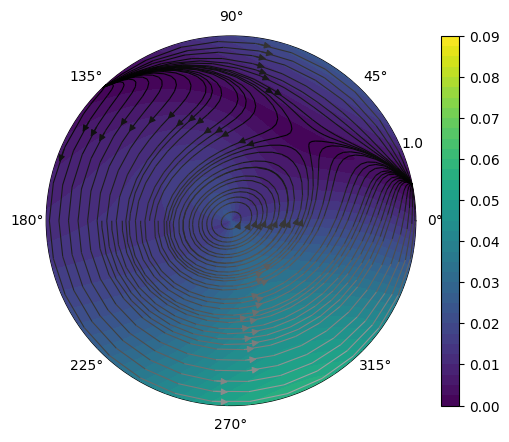

In [191]:

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
plt.sca(ax)
plt.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=40)
plt.ylim(0,1.0)
plt.xlim(0,2*np.pi)
ax = plt.gca()
ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=3,density=1,arrowstyle='-|>',cmap = 'gray',linewidth=0.8,broken_streamlines=False,)
plt.colorbar()

In [172]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from parfor import parfor
from tqdm.notebook import tqdm

In [144]:
eta1,eta2,r,phi,alpha,beta = sp.symbols('eta1 eta2 r phi alpha beta',real=True)
beta_rp = eta2*r/(eta1*sp.cos(alpha+2*phi))*(-sp.cos(alpha+phi)+sp.sqrt(sp.cos(alpha+phi)**2-sp.cos(alpha)*sp.cos(alpha+2*phi)))
beta_rm = eta2*r/(eta1*sp.cos(alpha+2*phi))*(-sp.cos(alpha+phi)-sp.sqrt(sp.cos(alpha+phi)**2-sp.cos(alpha)*sp.cos(alpha+2*phi)))

dr = sp.Rational(1,2) * r* (1-r**2)*(eta2**2 * r**2 * sp.cos(alpha) + 2 * beta*eta1*eta2*r*sp.cos(alpha+phi) + beta **2 *eta1**2 * sp.cos(alpha + 2*phi))
dpsi2 = - sp.Rational(1,2) * (1+r**2)*(eta2**2 * r**2 * sp.sin(alpha) + 2 * beta*eta1*eta2*r*sp.sin(alpha+phi) + beta**2 * eta1**2 * sp.sin(alpha+2*phi))
dpsi1 = - sp.Rational(1,2) * (2)*(eta1**2 *sp.sin(alpha) + 2 * beta*eta1*eta2*r *sp.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * sp.sin(alpha-2*phi))
dphi = dpsi2 - dpsi1
sol_rs =  sp.solve(dr,r)

In [150]:
sp.solve(dr,r)[3]

beta*eta1*(-cos(alpha + phi) + Abs(sin(phi)))/(eta2*cos(alpha))

In [ ]:
dphi.trigsimp()

beta**2*eta2**2*r**2*sin(alpha - 2*phi) + 2*beta*eta1*eta2*r*sin(alpha - phi) + eta1**2*sin(alpha) + (-r**2/2 - 1/2)*(beta**2*eta1**2*sin(alpha + 2*phi) + 2*beta*eta1*eta2*r*sin(alpha + phi) + eta2**2*r**2*sin(alpha))

In [153]:
alpha = 0.5
beta = 0.5
eta1 = 0.2
eta2 = 0.1

In [181]:
def r0_p(phi,alpha,beta,eta1,eta2):
    r0 = beta*eta1*(-np.cos(alpha+phi)+np.sin(phi)) / (eta2*np.cos(alpha))
    return r0

def r0_m(phi,alpha,beta,eta1,eta2):
    r0 = beta*eta1*(-np.cos(alpha+phi)-np.sin(phi)) / (eta2*np.cos(alpha))
    return r0

def r0_1(phi,alpha,beta,eta1,eta2):
    return np.ones_like(phi)
def r0_M1(phi,alpha,beta,eta1,eta2):
    return -np.ones_like(phi)
def r0_0(phi,alpha,beta,eta1,eta2):
    return np.zeros_like(phi)

def phi0(phi,alpha,beta,eta1,eta2,r):
    # eta1 delta peak의 분포 차
    r0 = r(phi,alpha,beta,eta1,eta2)
    dpsi2 = - 1/2 * (1+r0**2)*(eta2*r0*np.sin(alpha)+2*beta*eta1*eta2*r0*np.sin(alpha+phi)+beta**2*eta1**2*np.sin(alpha+2*phi))
    dpsi1 = - 1/2 * (2)*(eta1*np.sin(alpha)+2*beta*eta1*eta2*r0*np.sin(alpha-phi)+beta**2*eta2**2*r0**2*np.sin(alpha-2*phi))
    dphi = dpsi2 - dpsi1
    return dphi    

def F_Jm(r,phi,alpha,beta,eta1,eta2):
    # beta = eta2*r*(-np.cos(alpha+phi) - np.sin(phi))/ (eta1 * np.cos(alpha+2*phi))
    drdr = -r**2*(beta**2*eta1**2*np.cos(alpha + 2*phi) + 2*beta*eta1*eta2*r*np.cos(alpha + phi) + eta2**2*r**2*np.cos(alpha)) + r*(1 - r**2)*(2*beta*eta1*eta2*np.cos(alpha + phi) + 2*eta2**2*r*np.cos(alpha))/2 + (1 - r**2)*(beta**2*eta1**2*np.cos(alpha + 2*phi) + 2*beta*eta1*eta2*r*np.cos(alpha + phi) + eta2**2*r**2*np.cos(alpha))/2
    drdphi = r*(1 - r**2)*(-2*beta**2*eta1**2*np.sin(alpha + 2*phi) - 2*beta*eta1*eta2*r*np.sin(alpha + phi))/2
    dphidr = 2*beta**2*eta2**2*r*np.sin(alpha - 2*phi) + 2*beta*eta1*eta2*np.sin(alpha - phi) - r*(beta**2*eta1**2*np.sin(alpha + 2*phi) + 2*beta*eta1*eta2*r*np.sin(alpha + phi) + eta2**2*r**2*np.sin(alpha)) + (-r**2/2 - 1/2)*(2*beta*eta1*eta2*np.sin(alpha + phi) + 2*eta2**2*r*np.sin(alpha))
    dphidphi = -2*beta**2*eta2**2*r**2*np.cos(alpha - 2*phi) - 2*beta*eta1*eta2*r*np.cos(alpha - phi) + (-r**2/2 - 1/2)*(2*beta**2*eta1**2*np.cos(alpha + 2*phi) + 2*beta*eta1*eta2*r*np.cos(alpha + phi))
    J = np.array([[drdr,drdphi],[dphidr,dphidphi]])
    D = np.linalg.det(J)
    tau = np.trace(J)
    discriminant = tau**2 - 4*D
    return np.linalg.det(J),np.trace(J),discriminant
def Linear_analysis(Det,Trace,Delta):
    D_sign = np.sign(Det)
    T_sign = np.sign(Trace)
    Delta_sign = np.sign(Delta)
    if Delta_sign == 1:
        C = 'node'
    elif Delta_sign == -1:
        C = 'spiral'
    else:
        C = 'Degenerate'
    if D_sign == -1:
        return 'Saddle'
    elif D_sign == 0:
        return 'Line/ need to analysis nonlinearity'
    
    if T_sign == 1:
        B = 'Stable'
    elif T_sign == -1:
        B = 'Unstable'
    else:
        return 'Center/ Need to analysis nonlinearity'
    return B + ' ' + C
    


(0.0, 1.0)

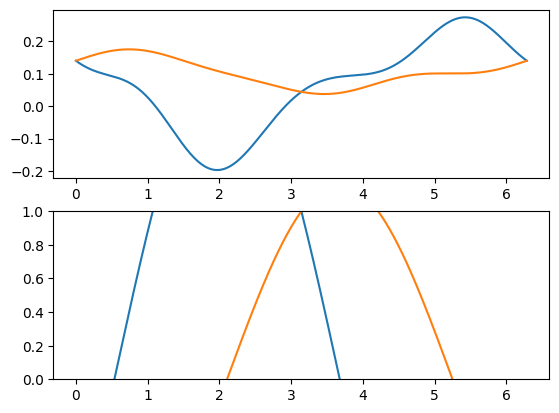

In [179]:
phi = np.linspace(0,np.pi*2,1000)
# fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

plt.subplot(211)
plt.plot(phi,phi0(phi,alpha,beta,eta1,eta2,r0_p))
plt.plot(phi,phi0(phi,alpha,beta,eta1,eta2,r0_m))

# plt.sca(ax)
plt.subplot(212)
plt.plot(phi,r0_p(phi,alpha,beta,eta1,eta2))
plt.plot(phi,r0_m(phi,alpha,beta,eta1,eta2))

plt.ylim(0,1)

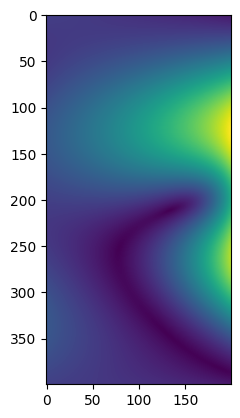

In [175]:
phis = np.linspace(0,2*np.pi,10000)
# alpha = 0.7
# beta = 0.8
# eta1 = 0.1
# eta2 = 1e-3
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]


In [176]:
alphas = np.linspace(0,np.pi/2,50,endpoint=False)
betas = np.linspace(0,1,51)[1:]
AL,BE = np.meshgrid(alphas,betas)


In [183]:
print('1')
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_1),bracket=[R_i,R_f])
        J_S = F_Jm(r0_1(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,beta,eta1,eta2)
        print(r0_1(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))

    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

print('0')
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_0),bracket=[R_i,R_f])
        r0_0(rot.root,alpha,beta,eta1,eta2),rot.root
        J_S = F_Jm(r0_0(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,beta,eta1,eta2)
        print(r0_0(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))

    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

print('Plus')
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_p),bracket=[R_i,R_f])
        r0_p(rot.root,alpha,beta,eta1,eta2),rot.root
        J_S = F_Jm(r0_p(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,beta,eta1,eta2)
        print(r0_p(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))

    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

print('Minus')
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_m),bracket=[R_i,R_f])
        r0_m(rot.root,alpha,beta,eta1,eta2),rot.root
        J_S = F_Jm(r0_m(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,beta,eta1,eta2)
        print(r0_m(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))

    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

1
0
Plus
1.0609151632142877 1.1073347372942257 Stable spiral
1.350021948140507 2.917214963507457 Saddle
Minus


In [ ]:
plt.pcolormesh(alphas,betas,np.array(RR))

In [ ]:


def get_R_phis(alphas,betas,eta1,eta2,R0,Pi,Pf):
    RR,PPhi,TT = [],[],[]
    for beta in tqdm(betas):
        @parfor(alphas,args=(beta,eta1,eta2,R0,Pi,Pf),bar=False)
        def get_R_phi(alpha,beta,eta1,eta2,R0,Pi,Pf):
            # for R_i,R_f in Range:
            try:
                rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,R0),bracket=[Pi,Pf])
                R,phi = R0(rot.root,alpha,beta,eta1,eta2),rot.root
                J_S = F_Jm(R,phi,alpha,beta,eta1,eta2)
                LA = Linear_analysis(*J_S)

                # print(R,',',phi,Linear_analysis(*J_S))
                return R,phi,LA
            except ValueError:
                return np.nan,np.nan,np.nan
            
        R,Phi,Type = zip(*get_R_phi)
        RR.append(R)
        PPhi.append(Phi)
        TT.append(Type)
    RR,PPhi,TT  = map(np.array,[RR,PPhi,TT])
    return RR,PPhi,TT